# <center>ScalerMart Business Case Study</center>

# Introduction
ScalerMart, a leading global electronics retailer, has experienced a significant downturn in sales, with a nearly 50% decline in revenue in 2020 compared to the previous year.
### What is expected
Analyze the customer-level transactional data to identify potential reasons behind the decline in sales. The objective is to recommend data-driven strategies aimed at improving sales performance.

# 1. Data
The analysis was done on the data located at - \
Customers - https://drive.google.com/file/d/1qPrP3QNWjxA_JHwao44dhVapEtQtlfus/view?usp=drive_link \
Products - https://drive.google.com/file/d/1fGc33yN_yTLI-1erTwo4-KdxFMcXDjJD/view?usp=drive_link \
Sales - https://drive.google.com/file/d/1S0hQDcTlY3ZUpyD1gf50Cujfs8UTSgnt/view?usp=drive_link


# 2. Libraries
Below are the libraries required for analysing and visualizing data

In [1]:
# libraries to analyze data
import numpy as np
import pandas as pd
import scipy.stats as sps

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# 3. Data loading and exploratory data analysis

## 3.1. Data loading
Loading the data into Pandas dataframe for easily handling of data

In [2]:
# read the file into a pandas dataframe
customer_df = pd.read_csv('Customers.csv', encoding='unicode_escape')
df = customer_df
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
None
*************************************************

*************************************************
Shape of the dataset is (15266, 10)
*************************************************

*************************************************
Number of nan/null values in each column: 
CustomerKey  

In [3]:
# look at the top 5 rows
df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [4]:
# read the file into a pandas dataframe
products_df = pd.read_csv('Products.csv', encoding='unicode_escape')
df = products_df
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB
None
*************************************************

*************************************************
Shape of the dataset is (2517, 10)
*************************************************

*************************************************
Number of nan/null va

In [5]:
# look at the top 5 rows
df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [6]:
# read the file into a pandas dataframe
sales_df = pd.read_csv('Sales.csv', encoding='unicode_escape')
df = sales_df
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB
None
*************************************************

*************************************************
Shape of the dataset is (62884, 9)
*************************************************

*************************************************
Number of nan/null values in each column: 
Order Number         0
Line Item  

In [7]:
# look at the top 5 rows
df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


### Insight
- We can drop columns *State Code and Zip Code* from **Customers** table, columns *Color, SubcategoryKey and CategoryKey* from **Products** table and columns *StoreKey and Currency Code* from **Sales** table as they are redundant
- Need to convert *Gender* column to category datatype and *Birthday* column to Datetime datatype from Customers table
- Need to remove $ sign from *Unit Cost USD* and *Unit Price USD* columns and convert them to float datatype and need to convert *Brand, Subcategory and Category* to category datatype from Products table
- Need to convert *Order Date and Delivery Date* columns to Datetime datatype from Sales table

In [8]:
customer_df = customer_df.drop(columns = ["State Code", "Zip Code"])
products_df = products_df.drop(columns = ["Color", "SubcategoryKey", "CategoryKey"])
sales_df = sales_df.drop(columns = ["StoreKey", "Currency Code"])

customer_df['Gender'] = customer_df['Gender'].astype('category')
customer_df['Birthday'] = pd.to_datetime(customer_df['Birthday'], format='%m/%d/%Y')

# Strip '$' and convert to float
temp_series = products_df['Unit Cost USD'].str.strip('$ ')
temp_series = temp_series.str.replace(',', '')
products_df['Unit Cost USD'] = temp_series.astype('float32')

# Strip '$' and convert to float
temp_series = products_df['Unit Price USD'].str.strip('$ ')
temp_series = temp_series.str.replace(',', '')
products_df['Unit Price USD'] = temp_series.astype('float32')

products_df['Brand'] = products_df['Brand'].astype('category')
products_df['Subcategory'] = products_df['Subcategory'].astype('category')
products_df['Category'] = products_df['Category'].astype('category')

sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'], format='%m/%d/%Y')
sales_df['Delivery Date'] = pd.to_datetime(sales_df['Delivery Date'], format='%m/%d/%Y')

## 3.2. Exploratory Data Analysis

We have to calculate the revenue, for which we need the number of units sold of all the products and their corresponding unit price. This calls for merging **Sales** and **Products** table

In [9]:
# Merge Sales and Products table on 
sales_df = pd.merge(sales_df, products_df, on='ProductKey', how='left')

# Create 'Revenue' column in Sales
sales_df['Revenue'] = sales_df['Quantity']*(sales_df['Unit Price USD'] - sales_df['Unit Cost USD'])
sales_df['Revenue'] = sales_df['Revenue'].round(2)

In [10]:
sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,ProductKey,Quantity,Product Name,Brand,Unit Cost USD,Unit Price USD,Subcategory,Category,Revenue
0,366000,1,2016-01-01,NaT,265598,1304,1,Contoso Lens Adapter M450 White,Contoso,31.270000,68.000000,Cameras & Camcorders Accessories,Cameras and camcorders,36.73
1,366001,1,2016-01-01,2016-01-13,1269051,1048,2,A. Datum SLR Camera X136 Silver,A. Datum,141.470001,427.000000,Digital SLR Cameras,Cameras and camcorders,571.06
2,366001,2,2016-01-01,2016-01-13,1269051,2007,1,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,220.639999,665.940002,Microwaves,Home Appliances,445.30
3,366002,1,2016-01-01,2016-01-12,266019,1106,7,Contoso SLR Camera M146 Orange,Contoso,148.080002,322.000000,Digital SLR Cameras,Cameras and camcorders,1217.44
4,366002,2,2016-01-01,2016-01-12,266019,373,1,Adventure Works Laptop8.9 E0890 White,Adventure Works,166.199997,326.000000,Laptops,Computers,159.80


We now need to plot the *revenue* for every year. So we need to extract *Year and Month* deatils from *Order Date* and group by *Year*/*Month* to get total revenue for that year/month. 

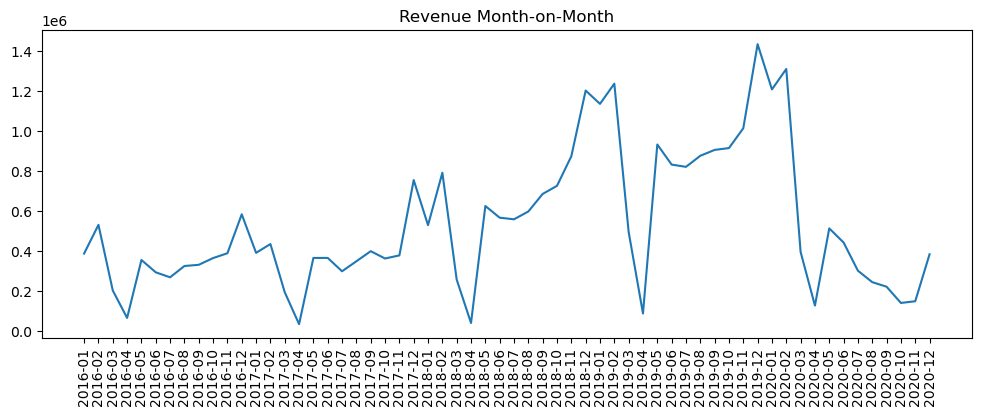

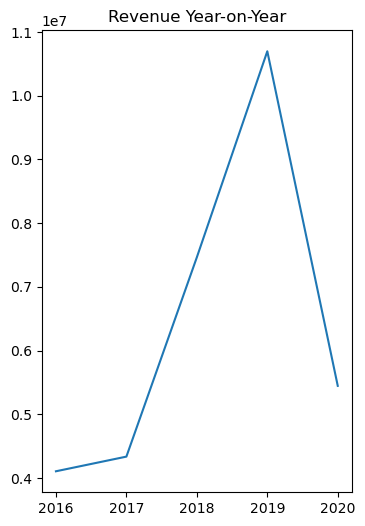

   Order Year      Revenue
0        2016   4107000.47
1        2017   4337064.06
2        2018   7464961.11
3        2019  10697738.90
4        2020   5447460.15


In [11]:
sales_df['Order Year'] = sales_df['Order Date'].dt.year
sales_df['Order Month'] = sales_df['Order Date'].dt.month
sales_df['Order YearMonth'] = sales_df['Order Date'].dt.strftime('%Y-%m')
# Year 2021 is incomplete with only first two months of data. So dropping Year 2021 data
sales_df.drop(sales_df[sales_df['Order Year'] == 2021].index, inplace = True)
# Revenue month-on-month
revenue_mom_df = sales_df.groupby(['Order YearMonth'], as_index=False).agg({'Revenue': 'sum'})
# Revenue year-on-year
revenue_yoy_df = sales_df.groupby(['Order Year'], as_index=False).agg({'Revenue': 'sum'})
plt.figure(figsize=(12,4))
plt.plot('Order YearMonth', 'Revenue', data=revenue_mom_df)
plt.title('Revenue Month-on-Month')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(4,6))
plt.plot('Order Year', 'Revenue', data=revenue_yoy_df)
plt.title('Revenue Year-on-Year')
plt.show()
print(revenue_yoy_df)

In [12]:
revenue_2019 = revenue_yoy_df[revenue_yoy_df['Order Year'] == 2019]['Revenue'].iloc[0]
revenue_2020 = revenue_yoy_df[revenue_yoy_df['Order Year'] == 2020]['Revenue'].iloc[0]
print('Revenue in 2019: ', revenue_2019)
print('Revenue in 2020: ', revenue_2020)
print('%Change in revenue from 2019 to 2020: ', ((revenue_2020 - revenue_2019)/revenue_2019)*100)

Revenue in 2019:  10697738.9
Revenue in 2020:  5447460.15
%Change in revenue from 2019 to 2020:  -49.07839683767193


### Insight
- We can see that the revenue fell by almost 50% in 2020.
- It is interesting to see from the Month-on-Month revenue graph that the revenue drops drastically every year in the month of April but shows a great recovery in the next month and eventually surpasses the previous high during December-January.
- This has been the trend since the year 2016 but the trend is broken in 2020.

### 3.2.1 Customer demographics based distribution

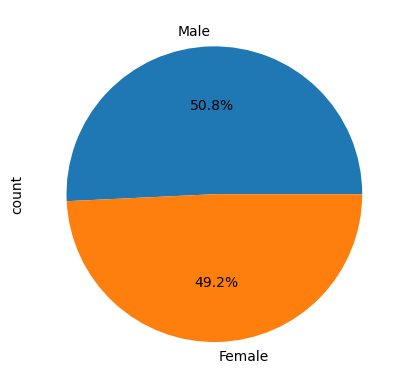

In [13]:
customer_df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

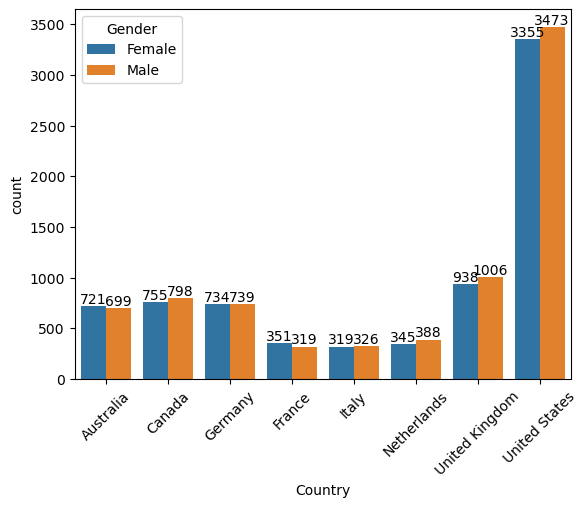

In [14]:
ax = sns.countplot(data=customer_df, x='Country', hue='Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.show()

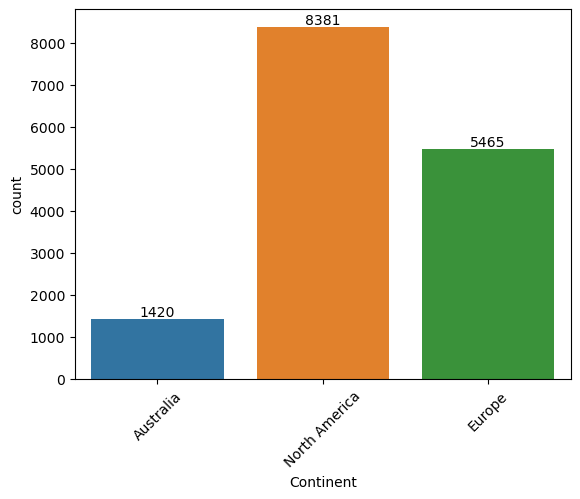

In [15]:
ax = sns.countplot(data=customer_df, x='Continent')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.show()

count    15266.000000
mean        52.313487
std         19.333710
min         18.879452
25%         35.584247
50%         52.469863
75%         68.936301
max         85.967123
Name: Age, dtype: float64


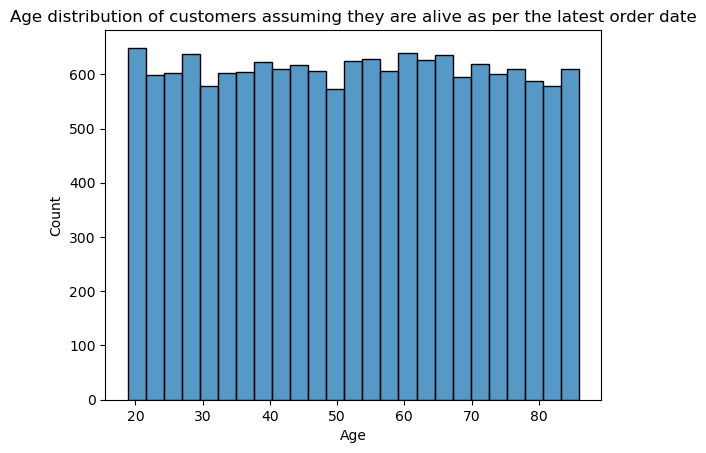

In [16]:
latest_order_date = sales_df['Order Date'].max()
current_age = (latest_order_date - customer_df['Birthday'])/np.timedelta64(1, 'Y')
current_age = current_age.rename('Age')
print(current_age.describe())
sns.histplot(data=current_age)
plt.title("Age distribution of customers assuming they are alive as per the latest order date")
plt.show()

### Insight
- The **male** and **female** customer distribution is same, around **50%**
- Customers from all the countries also have the same male-female distribution. **United States** has the **highest customer** base **followed by United Kingdom**
- **North America** has the **highest** number of **customers** among continents
- Customer from **all age**, ranging from 18 to 85 are **equally present**

# 4. User Segmentation

**Combining Customer table too**

In [17]:
# Merge Sales(already merged with Products) and Customer table 
sales_df = pd.merge(sales_df, customer_df, on='CustomerKey', how='left')

In [18]:
sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,ProductKey,Quantity,Product Name,Brand,Unit Cost USD,...,Order Year,Order Month,Order YearMonth,Gender,Name,City,State,Country,Continent,Birthday
0,366000,1,2016-01-01,NaT,265598,1304,1,Contoso Lens Adapter M450 White,Contoso,31.270000,...,2016,1,2016-01,Male,Tyler Vaught,London,Ontario,Canada,North America,1971-03-23
1,366001,1,2016-01-01,2016-01-13,1269051,1048,2,A. Datum SLR Camera X136 Silver,A. Datum,141.470001,...,2016,1,2016-01,Male,Frank Upchurch,Auberry,California,United States,North America,1995-11-20
2,366001,2,2016-01-01,2016-01-13,1269051,2007,1,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,220.639999,...,2016,1,2016-01,Male,Frank Upchurch,Auberry,California,United States,North America,1995-11-20
3,366002,1,2016-01-01,2016-01-12,266019,1106,7,Contoso SLR Camera M146 Orange,Contoso,148.080002,...,2016,1,2016-01,Female,Joan Roche,Red Deer,Alberta,Canada,North America,1962-08-24
4,366002,2,2016-01-01,2016-01-12,266019,373,1,Adventure Works Laptop8.9 E0890 White,Adventure Works,166.199997,...,2016,1,2016-01,Female,Joan Roche,Red Deer,Alberta,Canada,North America,1962-08-24


**Creating a column defining the age group to which a customer belongs to**

In [19]:
sales_df['Age'] = (sales_df['Order Date'] - sales_df['Birthday'])/np.timedelta64(1, 'Y')
sales_df['Age'] = sales_df['Age'].round(2)
bins = [0, 12, 20, 40, 60, 80, 100]
labels = ['Kid', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Super Senior']
# Segment the customers into groups
sales_df['Age Group'] = pd.cut(sales_df['Age'], bins=bins, labels=labels)

In [20]:
sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,ProductKey,Quantity,Product Name,Brand,Unit Cost USD,...,Order YearMonth,Gender,Name,City,State,Country,Continent,Birthday,Age,Age Group
0,366000,1,2016-01-01,NaT,265598,1304,1,Contoso Lens Adapter M450 White,Contoso,31.270000,...,2016-01,Male,Tyler Vaught,London,Ontario,Canada,North America,1971-03-23,44.81,Adult
1,366001,1,2016-01-01,2016-01-13,1269051,1048,2,A. Datum SLR Camera X136 Silver,A. Datum,141.470001,...,2016-01,Male,Frank Upchurch,Auberry,California,United States,North America,1995-11-20,20.13,Young Adult
2,366001,2,2016-01-01,2016-01-13,1269051,2007,1,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,220.639999,...,2016-01,Male,Frank Upchurch,Auberry,California,United States,North America,1995-11-20,20.13,Young Adult
3,366002,1,2016-01-01,2016-01-12,266019,1106,7,Contoso SLR Camera M146 Orange,Contoso,148.080002,...,2016-01,Female,Joan Roche,Red Deer,Alberta,Canada,North America,1962-08-24,53.39,Adult
4,366002,2,2016-01-01,2016-01-12,266019,373,1,Adventure Works Laptop8.9 E0890 White,Adventure Works,166.199997,...,2016-01,Female,Joan Roche,Red Deer,Alberta,Canada,North America,1962-08-24,53.39,Adult


## 4.1. Segmentation based on Customer's age group

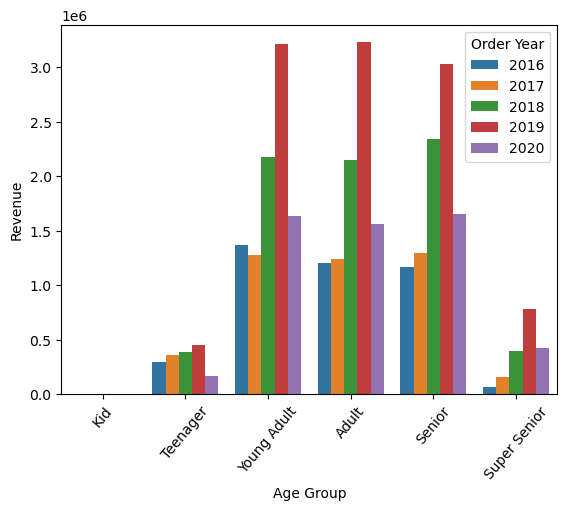

In [21]:
sns.barplot(data=sales_df, x = 'Age Group', y='Revenue', hue='Order Year', estimator="sum", errorbar=None)
plt.xticks(rotation=50)
plt.show()

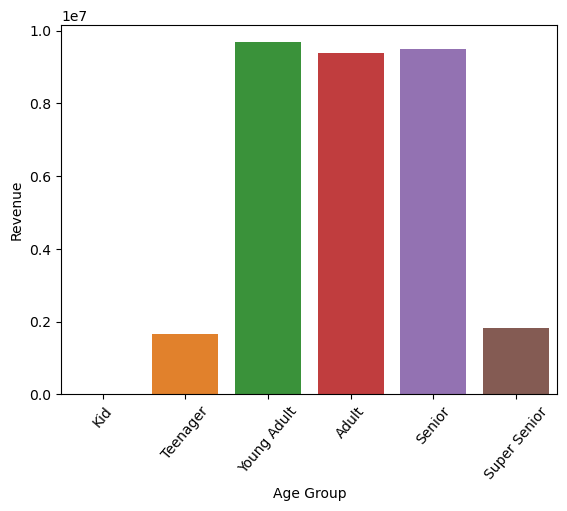

In [22]:
sns.barplot(data=sales_df, x = 'Age Group', y='Revenue', estimator="sum", errorbar=None)
plt.xticks(rotation=50)
plt.show()

### Insight
- It looks the revenue from age groups - Young Adult, Adult and Senior are similar
- Let us conduct hypothesis testing to see if that is true
- As there are three groups, let us check if we can use **one-way ANOVA test**. To use one-way ANOVA test, the samples should have normal distribution

**Check for normal distribution visually and via test**

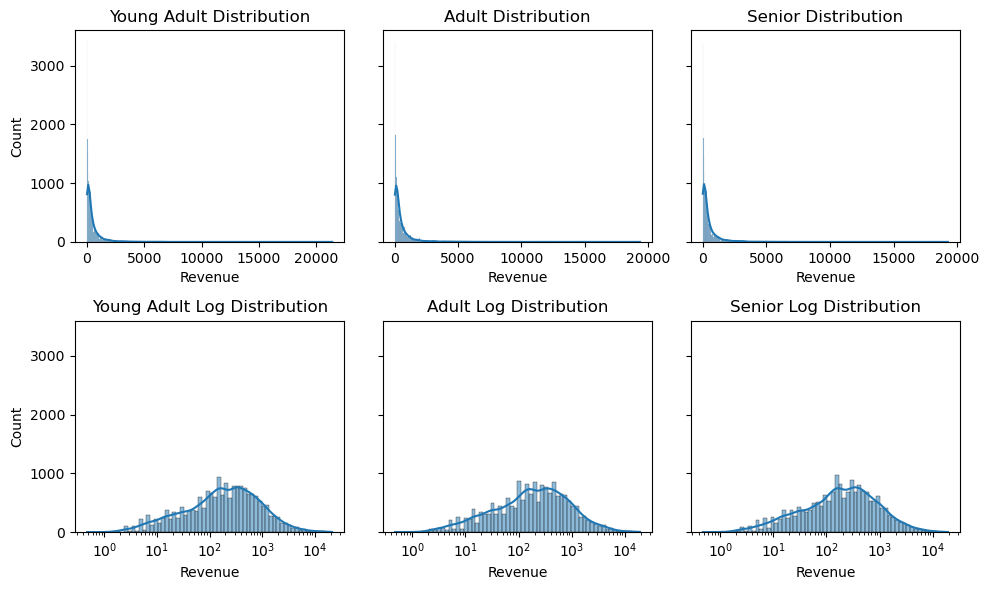

In [23]:
young_adult_df = sales_df[sales_df['Age Group'] == 'Young Adult']
adult_df = sales_df[sales_df['Age Group'] == 'Adult']
senior_df = sales_df[sales_df['Age Group'] == 'Senior']
fig, axes = plt.subplots(2, 3, sharey=True, figsize=(10,6))
sns.histplot(ax=axes[0,0], data=young_adult_df, x = 'Revenue', kde=True).set_title('Young Adult Distribution')
sns.histplot(ax=axes[0,1], data=adult_df, x = 'Revenue', kde=True).set_title('Adult Distribution')
sns.histplot(ax=axes[0,2], data=senior_df, x = 'Revenue', kde=True).set_title('Senior Distribution')
sns.histplot(ax=axes[1,0], data=young_adult_df, x = 'Revenue', log_scale=True, kde=True).set_title('Young Adult Log Distribution')
sns.histplot(ax=axes[1,1], data=adult_df, x = 'Revenue', log_scale=True, kde=True).set_title('Adult Log Distribution')
sns.histplot(ax=axes[1,2], data=senior_df, x = 'Revenue', log_scale=True, kde=True).set_title('Senior Log Distribution')
plt.tight_layout()
plt.show()

In [24]:
sample1 = np.log(young_adult_df['Revenue'])
sample2 = np.log(adult_df['Revenue'])
sample3 = np.log(senior_df['Revenue'])

t_stat, p_value = stats.shapiro(sample1)
print(f'p-value: {p_value}')
if(p_value > 0.05):
    print('Sample1 follows normal distribution')
else:
    print('Sample1 doesnt follow normal distribution')    
    

t_stat, p_value = stats.shapiro(sample2)
print(f'p-value: {p_value}')
if(p_value > 0.05):
    print('Sample2 follows normal distribution')
else:
    print('Sample2 doesnt follow normal distribution')
    

t_stat, p_value = stats.shapiro(sample3)
print(f'p-value: {p_value}')
if(p_value > 0.05):
    print('Sample3 follows normal distribution')
else:
    print('Sample3 doesnt follow normal distribution')

p-value: 2.4865206748182404e-35
Sample1 doesnt follow normal distribution
p-value: 6.091784578075495e-33
Sample2 doesnt follow normal distribution
p-value: 3.404771265356769e-33
Sample3 doesnt follow normal distribution


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Insight
- The Shapiro-Wilk test says that the samples are **not normally distributed** and hence we will use **Kruskal–Wallis test** instead of one-way ANOVA test

In [25]:
print('H0 : Revenue from Young Adults, Adults and Seniors are similar')
print('H1 : Revenue from Young Adults, Adults and Seniors are different')
t_stat, p_value = stats.kruskal(sample1, sample1, sample3)
print(f'p-value: {p_value}')
if(p_value > 0.05):
    print('Revenues are similar')
else:
    print('Revenues are different')

H0 : Revenue from Young Adults, Adults and Seniors are similar
H1 : Revenue from Young Adults, Adults and Seniors are different
p-value: 0.9867806603476335
Revenues are similar


### Insight
- From the **Kruskal–Wallis test**, we can conclude that the **revenues** from **Young Adults, Adults and Seniors are similar**

## 4.2. Segmentation based on Customer's country

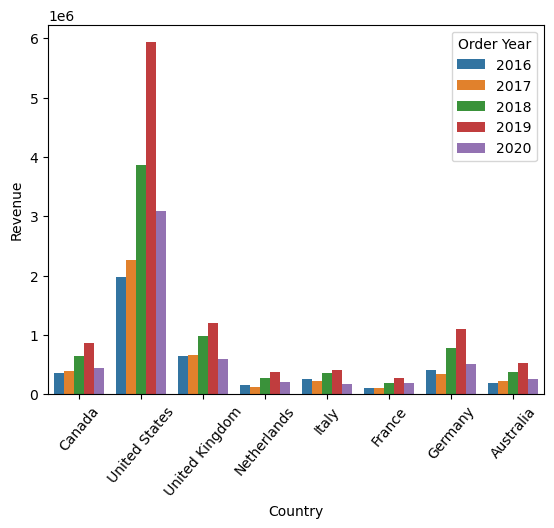

In [26]:
sns.barplot(data=sales_df, x = 'Country', y='Revenue', hue='Order Year', estimator="sum", errorbar=None)
plt.xticks(rotation=50)
plt.show()

### Insight
- The revenue has dropped by 50% in 2020 in allmost all countries

## 4.3. Segmentation based on Customer's gender

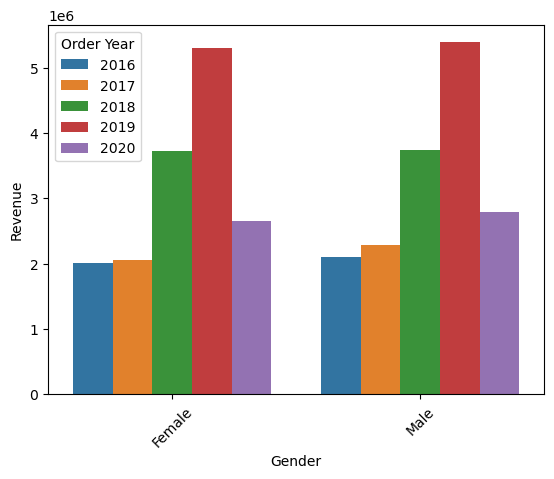

In [27]:
sns.barplot(data=sales_df, x = 'Gender', y='Revenue', hue='Order Year', estimator="sum", errorbar=None)
plt.xticks(rotation=45)
plt.show()

### Insight
- It looks the revenue from both genders - Male and Female are similar
- Let us conduct hypothesis testing to see if that is true
- As there are 2 groups, let us check if we can use **Two-Sample T-test**. To use Two-Sample T-test, the samples should have normal distribution

**Check for normal distribution visually and via test**

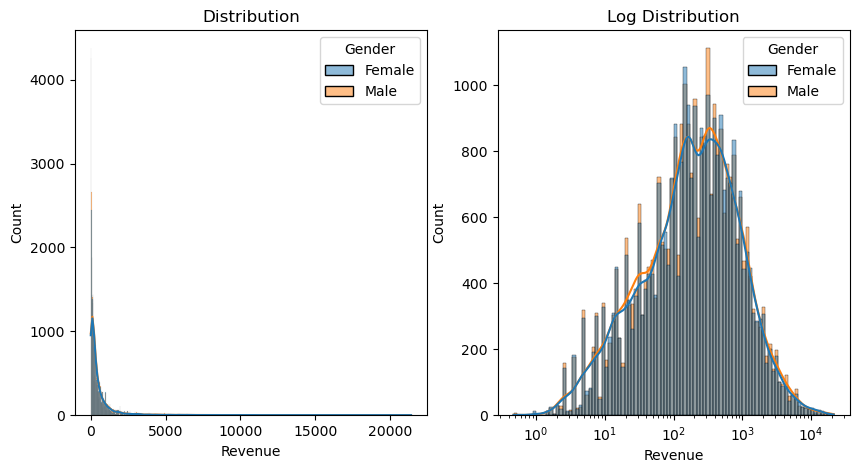

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(ax = axs[0], data=sales_df, x = 'Revenue', hue='Gender', kde=True).set_title('Distribution')
sns.histplot(ax = axs[1], data=sales_df, x = 'Revenue', hue='Gender', kde=True, log_scale=True).set_title('Log Distribution')
plt.show()

In [29]:
sample1 = np.log(sales_df[sales_df['Gender'] == 'Male']['Revenue'])
sample2 = np.log(sales_df[sales_df['Gender'] == 'Female']['Revenue'])

t_stat, p_value = stats.shapiro(sample1)
print(f'p-value: {p_value}')
if(p_value > 0.05):
    print('Sample1 follows normal distribution')
else:
    print('Sample1 doesnt follow normal distribution')    
    

t_stat, p_value = stats.shapiro(sample2)
print(f'p-value: {p_value}')
if(p_value > 0.05):
    print('Sample2 follows normal distribution')
else:
    print('Sample2 doesnt follow normal distribution')

p-value: 1.497791876578224e-40
Sample1 doesnt follow normal distribution
p-value: 7.480131202565874e-42
Sample2 doesnt follow normal distribution


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Insight
- The Shapiro-Wilk test says that the samples are **not normally distributed** and hence we will use **Mann-Whitney U test** instead of Two-Sample T-test

In [30]:
print('H0 : Revenue from Male and Female are similar')
print('H1 : Revenue from Male and Female are different')
t_stat, p_value = stats.mannwhitneyu(sample1, sample2, alternative='two-sided')
print(f'p-value: {p_value}')
if(p_value > 0.05):
    print('Revenues are similar')
else:
    print('Revenues are different')

H0 : Revenue from Male and Female are similar
H1 : Revenue from Male and Female are different
p-value: 0.5663336950598776
Revenues are similar


### Insight
- From the **Mann-Whitney U test**, we can conclude that the **revenues** from both **Male and Female are similar**

## 4.4. Segmentation based on product's brand

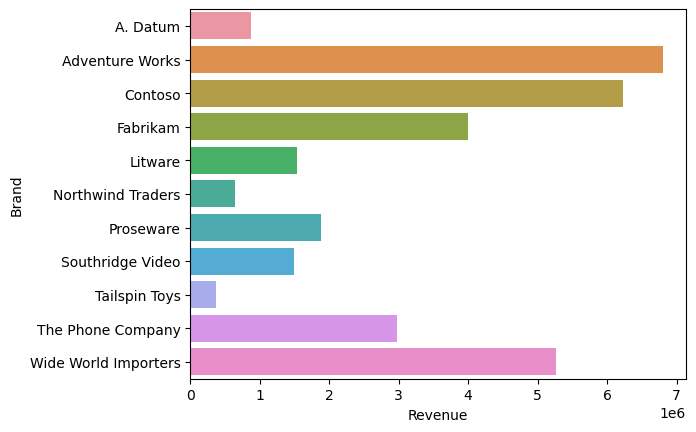

In [31]:
sns.barplot(data=sales_df, y = 'Brand', x='Revenue', estimator="sum", errorbar=None)
plt.show()

### Insight
- The brand **Adventure Works** has generated **highest revenue** and **Tailspin Toys** the **least revenue**

## 4.5. Segmentation based on product's category

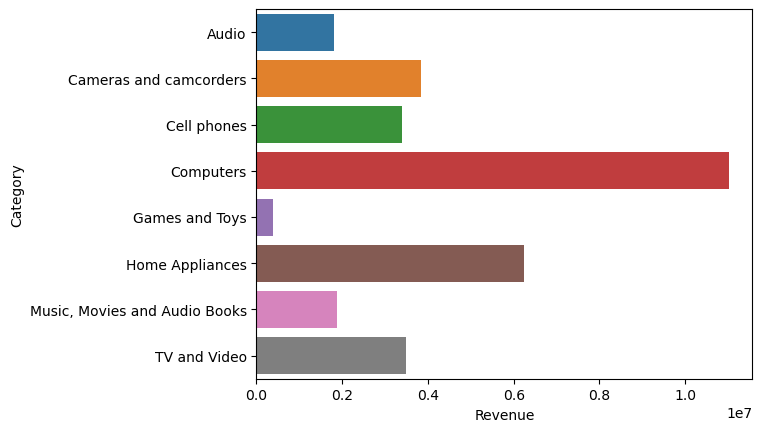

In [32]:
sns.barplot(data=sales_df, y = 'Category', x='Revenue', estimator="sum", errorbar=None)
plt.show()

### Insight
- The category **Computers** has generated **highest revenue** and **Games and Toys** the **least revenue**

## 4.6. Segmentation based on product's subcategory

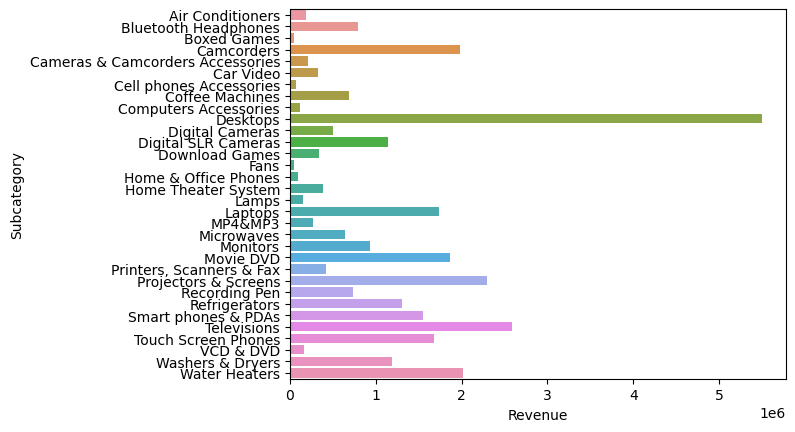

In [33]:
sns.barplot(data=sales_df, y = 'Subcategory', x='Revenue', estimator="sum", errorbar=None)
plt.show()

In [34]:
sales_df.groupby('Subcategory')['Revenue'].sum().sort_values(ascending=False)

Subcategory
Desktops                            5501067.69
Televisions                         2593288.33
Projectors & Screens                2296017.80
Water Heaters                       2022457.96
Camcorders                          1979489.06
Movie DVD                           1868778.38
Laptops                             1742188.13
Touch Screen Phones                 1684685.45
Smart phones & PDAs                 1556232.22
Refrigerators                       1312095.85
Washers & Dryers                    1188974.98
Digital SLR Cameras                 1144624.65
Monitors                             938255.16
Bluetooth Headphones                 795492.59
Recording Pen                        732838.81
Coffee Machines                      687793.77
Microwaves                           644961.91
Digital Cameras                      503344.67
Printers, Scanners & Fax             421797.11
Home Theater System                  388744.24
Download Games                       337431.17
C

### Insight
- The subcategory **Desktops** has generated **highest revenue** and **Boxed Games** the **least revenue**

## 4.7. RFM Segmentation

**Work on a reduced dataset**

In [35]:
sales_reduced_df = sales_df[['Order Number', 'Order Date', 'CustomerKey', 'Revenue']]
sales_reduced_df.head()

,Order Number,Order Date,CustomerKey,Revenue
0,366000,2016-01-01,265598,36.73
1,366001,2016-01-01,1269051,571.06
2,366001,2016-01-01,1269051,445.30
3,366002,2016-01-01,266019,1217.44
4,366002,2016-01-01,266019,159.80


**Calculate and add a column which shows the last order date of each customer**

In [36]:
last_order_date_by_customer = sales_reduced_df.groupby('CustomerKey').agg({'Order Date':'last'}).reset_index()
last_order_date_by_customer.rename(columns = {'Order Date':'Last Order Date'}, inplace = True)
sales_reduced_df = sales_reduced_df.merge(last_order_date_by_customer, on='CustomerKey', how='left')
sales_reduced_df.head()

,Order Number,Order Date,CustomerKey,Revenue,Last Order Date
0,366000,2016-01-01,265598,36.73,2019-10-15
1,366001,2016-01-01,1269051,571.06,2016-01-01
2,366001,2016-01-01,1269051,445.30,2016-01-01
3,366002,2016-01-01,266019,1217.44,2019-01-08
4,366002,2016-01-01,266019,159.80,2019-01-08


**Calculate the recency of every customer**

In [37]:
max_order_date = sales_reduced_df['Order Date'].max()
sales_reduced_df['Recency'] = max_order_date - sales_reduced_df['Last Order Date']
sales_reduced_df.head()

,Order Number,Order Date,CustomerKey,Revenue,Last Order Date,Recency
0,366000,2016-01-01,265598,36.73,2019-10-15,443 days
1,366001,2016-01-01,1269051,571.06,2016-01-01,1826 days
2,366001,2016-01-01,1269051,445.30,2016-01-01,1826 days
3,366002,2016-01-01,266019,1217.44,2019-01-08,723 days
4,366002,2016-01-01,266019,159.80,2019-01-08,723 days


**Calculate the frequency of every customer**

In [38]:
frequency = sales_reduced_df['CustomerKey'].value_counts().reset_index()
frequency.rename(columns = {'count':'Frequency'}, inplace = True)
sales_reduced_df = sales_reduced_df.merge(frequency, on='CustomerKey', how='left')
sales_reduced_df.head()

,Order Number,Order Date,CustomerKey,Revenue,Last Order Date,Recency,Frequency
0,366000,2016-01-01,265598,36.73,2019-10-15,443 days,8
1,366001,2016-01-01,1269051,571.06,2016-01-01,1826 days,2
2,366001,2016-01-01,1269051,445.30,2016-01-01,1826 days,2
3,366002,2016-01-01,266019,1217.44,2019-01-08,723 days,6
4,366002,2016-01-01,266019,159.80,2019-01-08,723 days,6


**Calculate the monetory value of every customer**

In [39]:
monetory_by_customer = sales_reduced_df.groupby('CustomerKey').agg({'Revenue':'sum'}).reset_index()
monetory_by_customer.rename(columns = {'Revenue':'Monetory'}, inplace = True)
sales_reduced_df = sales_reduced_df.merge(monetory_by_customer, on='CustomerKey', how='left')
sales_reduced_df.head()

,Order Number,Order Date,CustomerKey,Revenue,Last Order Date,Recency,Frequency,Monetory
0,366000,2016-01-01,265598,36.73,2019-10-15,443 days,8,768.82
1,366001,2016-01-01,1269051,571.06,2016-01-01,1826 days,2,1016.36
2,366001,2016-01-01,1269051,445.30,2016-01-01,1826 days,2,1016.36
3,366002,2016-01-01,266019,1217.44,2019-01-08,723 days,6,4929.63
4,366002,2016-01-01,266019,159.80,2019-01-08,723 days,6,4929.63


**Reduce the dataset to only Recency, Frequency and Monetory of every customer**

In [40]:
rfm_df = sales_reduced_df.groupby(['CustomerKey']).agg({'Recency':'first', 'Frequency':'first', 'Monetory':'first'}).reset_index()
rfm_df.head()

,CustomerKey,Recency,Frequency,Monetory
0,301,416 days,1,395.86
1,325,362 days,10,3380.07
2,554,392 days,4,504.33
3,1042,1031 days,3,732.17
4,1314,1108 days,5,1489.01


**Calculate the RFM Score**

In [41]:
# Create RFM group
rfm_df['R'] = pd.qcut(x=rfm_df['Recency'].rank(method='first'), q=5, labels = range(5,0,-1))
rfm_df['F'] = pd.qcut(x=rfm_df['Frequency'].rank(method='first'), q=5, labels = range(1,6,1))
rfm_df['M'] = pd.qcut(x=rfm_df['Monetory'].rank(method='first'), q=5, labels = range(1,6,1))

# RFM Score
rfm_df['R'] =  rfm_df['R'].astype(int)
rfm_df['F'] =  rfm_df['F'].astype(int)
rfm_df['M'] =  rfm_df['M'].astype(int)
rfm_df['RFM Score']  = rfm_df[['R','F','M']].sum(axis = 1)

rfm_df.head()

,CustomerKey,Recency,Frequency,Monetory,R,F,M,RFM Score
0,301,416 days,1,395.86,3,1,1,5
1,325,362 days,10,3380.07,4,5,4,13
2,554,392 days,4,504.33,4,3,2,9
3,1042,1031 days,3,732.17,1,2,2,5
4,1314,1108 days,5,1489.01,1,3,3,7


**Assign an RFM level to a customer based on the RFM Score**

![RFM Segmentation Image](RFM_Segmentation.png "RFM Segmentation")

In [42]:
# RFM Function
def rfm_segment(df):
    if\
    ((df['R'] == 5) and
     (df['F'] == 5) and
     (df['M'] >= 4)):
        return 'CHAMPIONS'
    elif\
    ((df['R'] >= 4) and 
     (df['F'] >= 4) and 
     (df['M'] >= 4)):
        return 'LOYAL CUSTOMERS'
    elif\
    ((df['R'] >= 4) and 
     (df['F'] == 3) and 
     (df['M'] >= 4)):
        return 'POTENTIAL LOYALIST'
    elif\
    ((df['R'] >= 4) and 
     ((df['F'] >= 1) and (df['F'] <= 2)) and
     (df['M'] >= 1)):
        return 'NEW CUSTOMER'
    elif\
    ((df['R'] >= 4) and 
     (df['F'] >= 3) and 
     ((df['M'] >= 1) and (df['M'] <= 3))):
        return 'PROMISING'
    elif\
    ((((df['R'] >= 1) and (df['R'] <= 2)) and
      (df['F'] >= 4) and
      ((df['M'] >= 1) and (df['M'] <= 3))) or
     ((df['R'] == 3) and
      (df['F'] >= 3) and
      ((df['M'] >= 1) and (df['M'] <= 3)))):
        return 'NEEDS ATTENTION'
    elif\
    ((((df['R'] >= 1) and (df['R'] <= 2)) and
      (df['F'] == 3) and
      (df['M'] >= 1)) or
     ((df['R'] == 3) and
      ((df['F'] >= 1) and (df['F'] <= 2)) and
      (df['M'] >= 1))):
        return 'ABOUT TO SLEEP'
    elif\
    ((df['R'] == 3) and
     (df['F'] >= 3) and
     (df['M'] >= 4)):
        return "AT RISK"
    elif\
    (((df['R'] >= 1) and (df['R'] <= 2)) and
     (df['F'] >= 4) and
     (df['M'] >= 4)):
        return "DONT LOSE THEM"
    elif\
    (((df['R'] == 1) and
      (df['F'] == 2) and
      (df['M'] >= 1)) or
     ((df['R'] == 2) and
      ((df['F'] >= 1) and (df['F'] <= 2)) and
      (df['M'] >= 1))):
        return 'HIBERNATING'
    elif\
    ((df['R'] == 1) and
     (df['F'] == 1) and
     (df['M'] >= 1)):
        return 'LOST'
    else:
        return 'UNIDENTIFIED'

#  apply RFM function
rfm_df['RFM_level'] = rfm_df.apply(rfm_segment, axis = 1)
rfm_df.head()

,CustomerKey,Recency,Frequency,Monetory,R,F,M,RFM Score,RFM_level
0,301,416 days,1,395.86,3,1,1,5,ABOUT TO SLEEP
1,325,362 days,10,3380.07,4,5,4,13,LOYAL CUSTOMERS
2,554,392 days,4,504.33,4,3,2,9,PROMISING
3,1042,1031 days,3,732.17,1,2,2,5,HIBERNATING
4,1314,1108 days,5,1489.01,1,3,3,7,ABOUT TO SLEEP


In [43]:
sales_df = pd.merge(sales_df, rfm_df[['CustomerKey', 'RFM_level']], on='CustomerKey', how='left')
sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,ProductKey,Quantity,Product Name,Brand,Unit Cost USD,...,Gender,Name,City,State,Country,Continent,Birthday,Age,Age Group,RFM_level
0,366000,1,2016-01-01,NaT,265598,1304,1,Contoso Lens Adapter M450 White,Contoso,31.270000,...,Male,Tyler Vaught,London,Ontario,Canada,North America,1971-03-23,44.81,Adult,NEEDS ATTENTION
1,366001,1,2016-01-01,2016-01-13,1269051,1048,2,A. Datum SLR Camera X136 Silver,A. Datum,141.470001,...,Male,Frank Upchurch,Auberry,California,United States,North America,1995-11-20,20.13,Young Adult,HIBERNATING
2,366001,2,2016-01-01,2016-01-13,1269051,2007,1,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,220.639999,...,Male,Frank Upchurch,Auberry,California,United States,North America,1995-11-20,20.13,Young Adult,HIBERNATING
3,366002,1,2016-01-01,2016-01-12,266019,1106,7,Contoso SLR Camera M146 Orange,Contoso,148.080002,...,Female,Joan Roche,Red Deer,Alberta,Canada,North America,1962-08-24,53.39,Adult,DONT LOSE THEM
4,366002,2,2016-01-01,2016-01-12,266019,373,1,Adventure Works Laptop8.9 E0890 White,Adventure Works,166.199997,...,Female,Joan Roche,Red Deer,Alberta,Canada,North America,1962-08-24,53.39,Adult,DONT LOSE THEM


**Check the revenue, over the years, from customers belonging to different RFM Level**

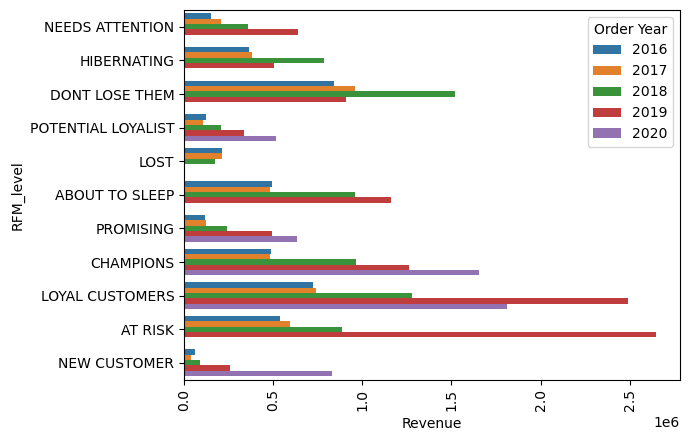

In [44]:
sns.barplot(data=sales_df, y = 'RFM_level', x='Revenue', hue='Order Year', estimator="sum", errorbar=None)
plt.xticks(rotation=90)
plt.show()

### Insight
- It is clearly visible that the **revenue in 2020** is majorly due to **loyal**(Champions, Loyal Customers, Potential Loyalist) and **new customers**(New and Promising Customers)
- All the other segments of customers have not bought anything in 2020.

 # 5. Recommendation

- The reason behind almost 50% decline in revenue in 2020 compared to previous year is due to the inability to keep the customers engaged. The company ScalerMart should **put efforts** on **converting** all customers to be in the **loyal** group - Champions, Loyal Customers, Potential Loyalist
- **Focus** should be more on customers falling under **Needs Attention, About To Sleep, At Risk** and **Dont Lose Them** group
- Especially these customers should be attracted by **providing them special discounts and offer coupons** so that they come back to purchase more and **become repeat customers**.
- ScalerMart should provide them **better offers and better service** so that these customers **become loyal customers**.